In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid as trapz
from scipy.integrate import simpson as simps

In [13]:
def f(x):
    return 4/(1+x**2)

In [14]:

def mid_point_rule(x1,y1):
    dx = x1[1] - x1[0]
    return sum([y1[i] * dx for i in range(len(y1))])

def trapezoidal_rule(x1,y1):
    return trapz(x=x1,y=y1)

def simpson_rule(x1,y1):
    return simps(x=x1,y=y1)


In [15]:
def calculate_errors(x, y, m):
    mid_point_errors = []
    trapezoidal_errors = []
    simpson_errors = []
    for i in range(1, m + 1):
        ab = np.linspace(start=0, stop=1, num=2**i+1)
        yab = f(ab)
        x1=np.array([(ab[i]+ab[i-1])/2 for i in range(1, len(ab))])
        y1=f(x1)
        mid_point_errors.append(np.abs(np.pi - mid_point_rule(x1, y1)))
        trapezoidal_errors.append(np.abs(np.pi - trapezoidal_rule(ab, yab)))
        simpson_errors.append(np.abs(np.pi - simpson_rule(ab, yab)))
    return mid_point_errors, trapezoidal_errors, simpson_errors

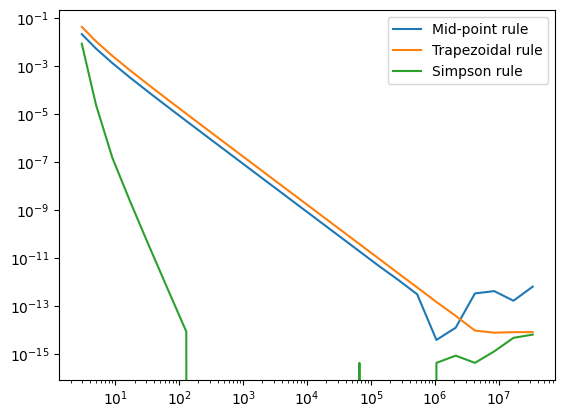

In [16]:
a = 0   
b = 1
m=25
n = np.array([1+2**(i) for i in range(1,m+1)])

mid_point_errors, trapezoidal_errors, simpson_errors = calculate_errors(a, b, m)

plt.plot(n, mid_point_errors, label='Mid-point rule')
plt.plot(n, trapezoidal_errors, label='Trapezoidal rule')
plt.plot(n, simpson_errors, label='Simpson rule')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [17]:
#b
print("Minimal relative errors:")
print(f"Midpoint_rule: {np.format_float_scientific(min(mid_point_errors), precision=3)}%")
print(f"Trapezoid: {np.format_float_scientific(min(trapezoidal_errors), precision=3)}%")
print(f"Simpson: {min(simpson_errors)}%")

In [18]:
from numpy.polynomial.legendre import leggauss as gauss


In [19]:
def gauss_legendre_rule(a, b, n):
    x, w = gauss(n)
    return np.sum(w * f((b - a) / 2 * x + (a + b) / 2)/2)

[5.84073464e-02 5.94833002e-03 5.24513627e-04 1.92516560e-05
 1.37050398e-08 4.24022062e-08 2.66395661e-09 7.06750214e-11
 1.54898316e-12 2.53130850e-13 1.11022302e-14 0.00000000e+00
 0.00000000e+00 4.44089210e-16 1.33226763e-15 0.00000000e+00
 4.44089210e-16 4.44089210e-16 0.00000000e+00 4.44089210e-16
 4.44089210e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.44089210e-16]


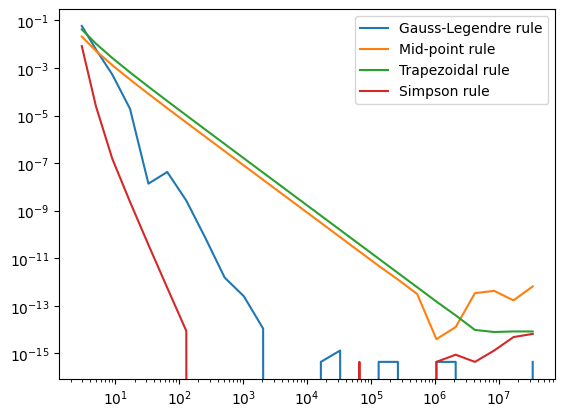

In [20]:
gauss_legendre_errors = np.array([np.abs(np.pi - gauss_legendre_rule(a, b, i)) for i in range(1, m + 1)])
plt.plot(n, gauss_legendre_errors, label='Gauss-Legendre rule')
plt.plot(n, mid_point_errors, label='Mid-point rule')
plt.plot(n, trapezoidal_errors, label='Trapezoidal rule')
plt.plot(n, simpson_errors, label='Simpson rule')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()